# BigMart Outlet Sales

The Meta data:
* **Item_Identifier**: unique product ID.
* **Item_Weight**: weight of product.
* **Item_Fat_Content**: whether the product is low fat or not.
* **Item_Visibility**: The % total display area of all products in a store allocated to the particular product.
* **Item_Type**: the category to which the product belongs.
* **Item_MRP**: maximum retail price (list price) of the product.
* **Outlet_Identifier**: unique store ID.
* **Outlet_Establishment_Year**: the year in which store was established.
* **Outlet_Size**: the size of the store in terms of ground area covered.
* **Outlet_Location_Type**: the type of city in which the store is located.
* **Outlet_Type**: whether the outlet is just a grocery store or some sort of supermarket.
* **Item_Outlet_Sales**: sales of the product in the particular store. This is the outcome variable to be predicted.

We will see the correlation between feature and see what feature have high correlation with the **Item_Outlet_Sales** feature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the data

df = pd.read_csv('bigmart_sales.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Looking the statistics of the data

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Check missing value

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Preprocessing Data

In [7]:
# Copy the dataframe to new dataframe

df_copy = df.copy()
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# Checking the value of the columns with null value
df_copy['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [9]:
df_copy['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
# Will remove the Item_Identifier feature

df_copy = df_copy.drop(columns = 'Item_Identifier')

In [15]:
# Handling missing (null) value

# Will replace Item_Weight null values with its median

df_copy['Item_Weight'] = df_copy['Item_Weight'].fillna(df_copy['Item_Weight'].median())
df_copy.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
# Will replace Outlet_Size null values with 'High' category

df_copy['Outlet_Size'] = df_copy['Outlet_Size'].replace(np.nan, 'High')

In [17]:
df_copy.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
# Clean the duplicate data in Item_Fat_Content feature

df_copy['Item_Fat_Content'] = df_copy['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df_copy['Item_Fat_Content'] = df_copy['Item_Fat_Content'].replace(['reg'], 'Regular')

## Visualization

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


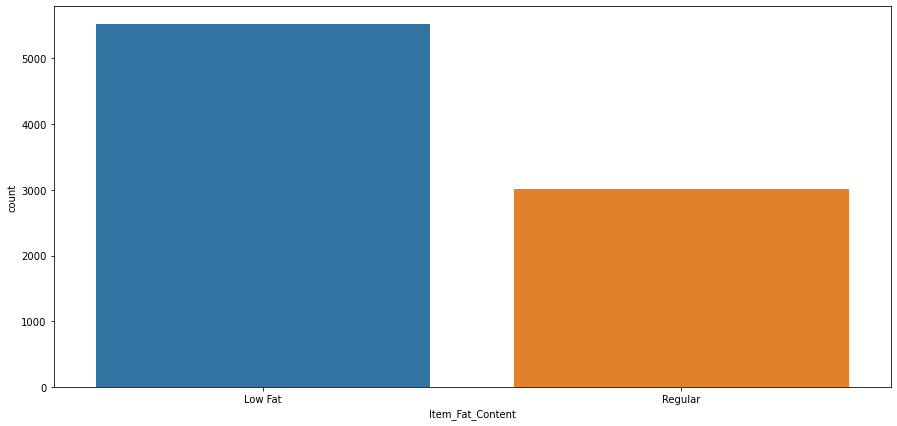

In [27]:
print(df_copy['Item_Fat_Content'].value_counts())
plt.figure(figsize=(15,7))
viz = sns.countplot(df_copy['Item_Fat_Content'])

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


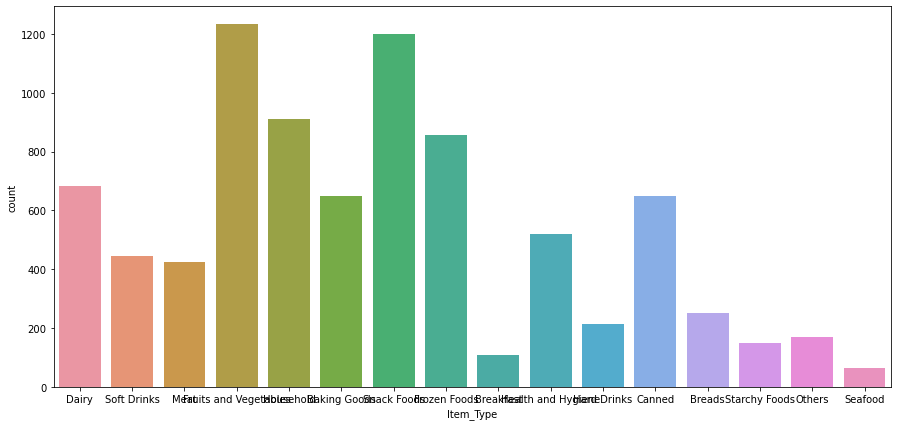

In [30]:
print(df_copy['Item_Type'].value_counts())
plt.figure(figsize=(15,7))
viz = sns.countplot(df_copy['Item_Type'])

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


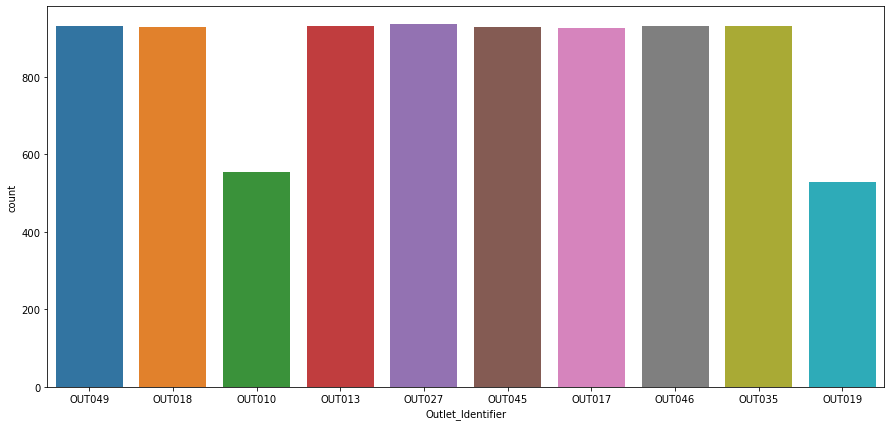

In [31]:
print(df_copy['Outlet_Identifier'].value_counts())
plt.figure(figsize=(15,7))
viz = sns.countplot(df_copy['Outlet_Identifier'])

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


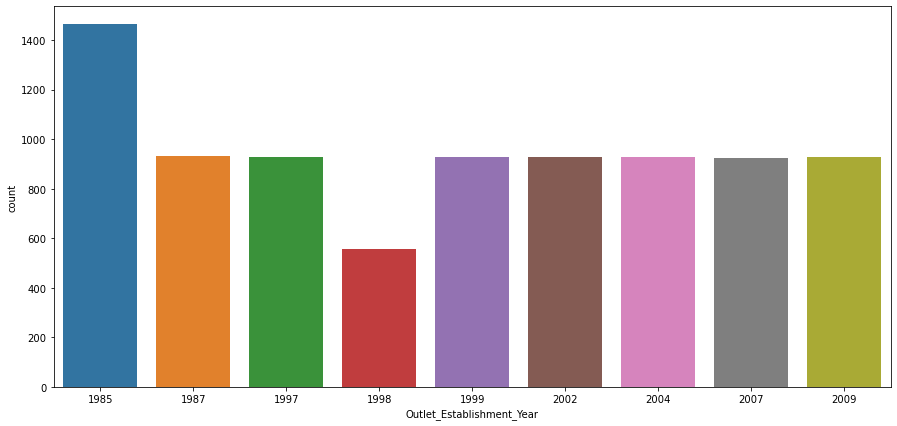

In [32]:
print(df_copy['Outlet_Establishment_Year'].value_counts())
plt.figure(figsize=(15,7))
viz = sns.countplot(df_copy['Outlet_Establishment_Year'])

High      3342
Medium    2793
Small     2388
Name: Outlet_Size, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


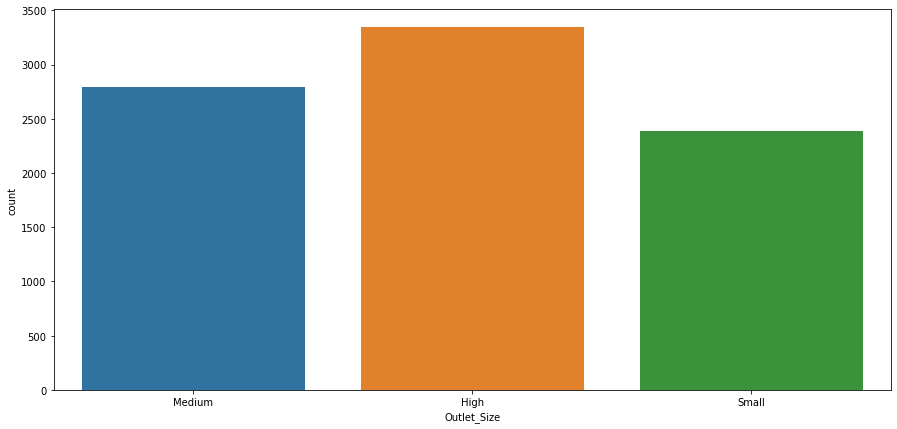

In [33]:
print(df_copy['Outlet_Size'].value_counts())
plt.figure(figsize=(15,7))
viz = sns.countplot(df_copy['Outlet_Size'])

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


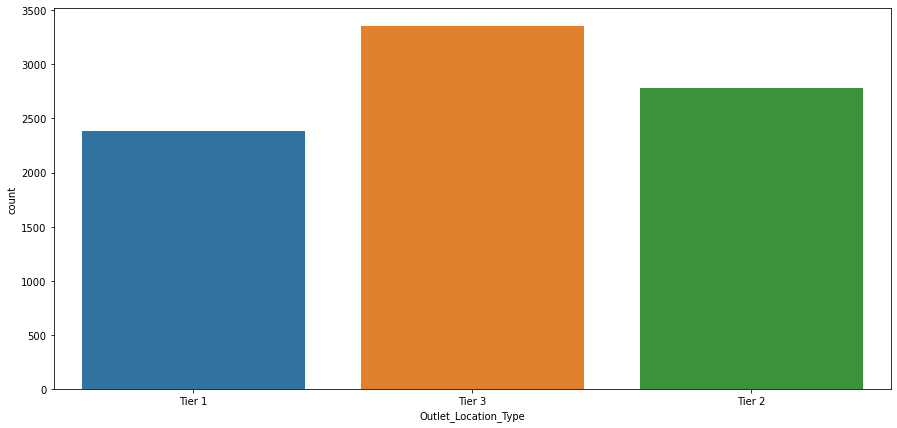

In [34]:
print(df_copy['Outlet_Location_Type'].value_counts())
plt.figure(figsize=(15,7))
viz = sns.countplot(df_copy['Outlet_Location_Type'])

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


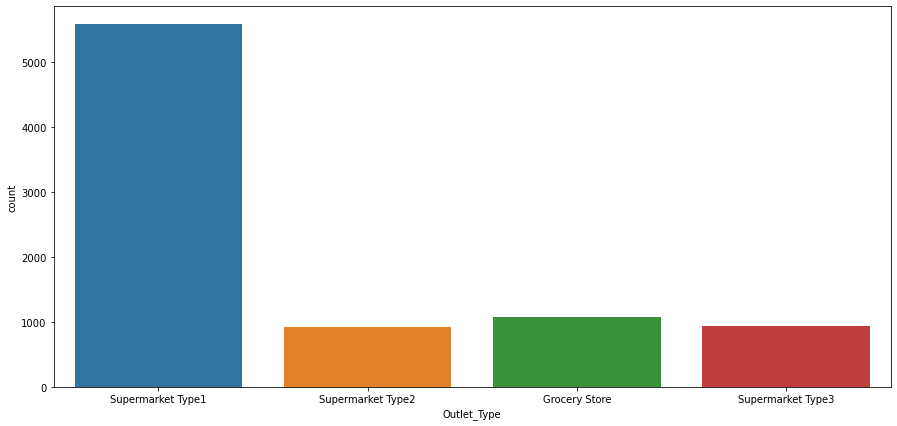

In [35]:
print(df_copy['Outlet_Type'].value_counts())
plt.figure(figsize=(15,7))
viz = sns.countplot(df_copy['Outlet_Type'])

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Name: Item_Outlet_Sales, dtype: float64


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

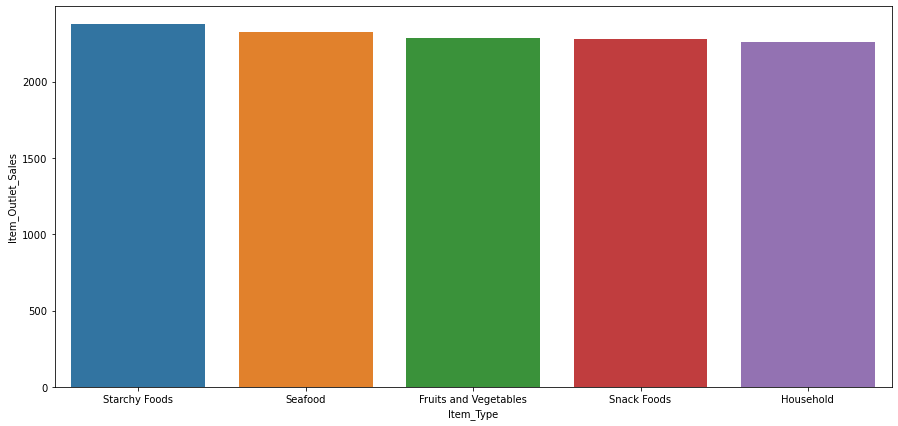

In [39]:
# Top 5 items

top_item = df_copy.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).head(5)
print(top_item)
plt.figure(figsize=(15,7))
top_item = pd.DataFrame(top_item).reset_index()
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=top_item)

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
Name: Item_Outlet_Sales, dtype: float64


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

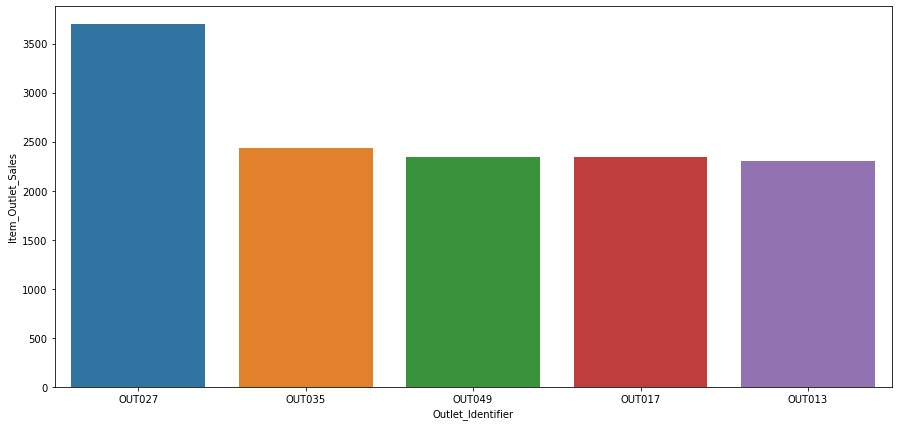

In [41]:
# Top 5 outlet

top_outlet = df_copy.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False).head(5)
print(top_outlet)
plt.figure(figsize=(15,7))
top_outlet = pd.DataFrame(top_outlet).reset_index()
sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=top_outlet)

## Correlation

In [42]:
corr_mtx = df_copy.corr(method='pearson')
corr_mtx

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

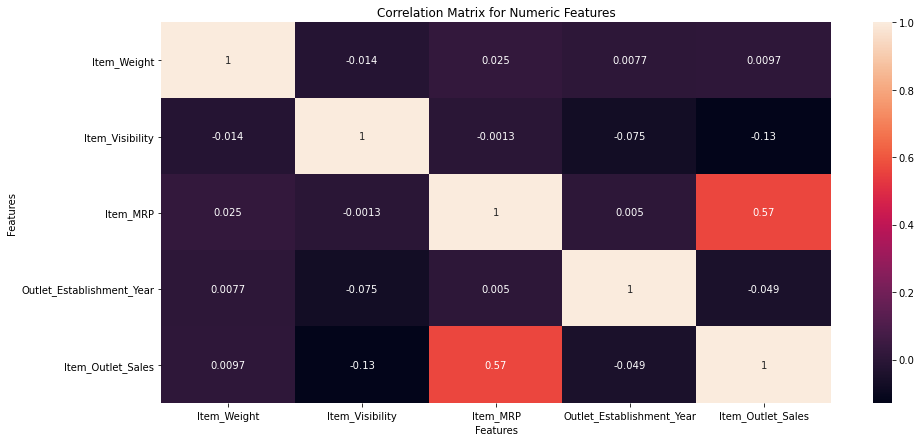

In [43]:
# Plot the Pearson Correlation matrix using heatmap

plt.figure(figsize=(15,7))
sns.heatmap(corr_mtx, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show

In [45]:
# Numerized the object columns

df_num = df_copy.copy()

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,2002,0,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


<function matplotlib.pyplot.show(close=None, block=None)>

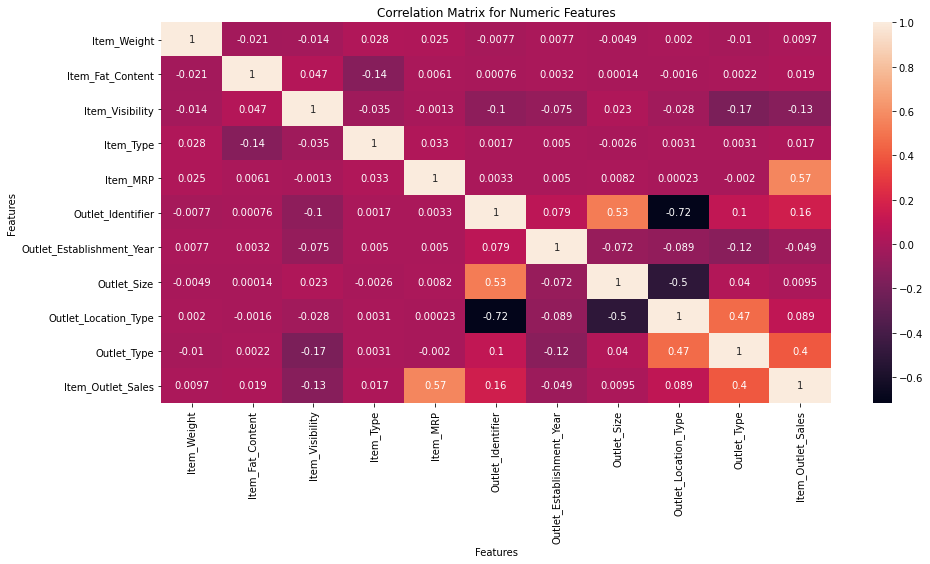

In [46]:
# Pearson Correlation Matrix heatmap

corr_mtx2 = df_num.corr(method='pearson')

plt.figure(figsize=(15,7))
sns.heatmap(corr_mtx2, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show

In [48]:
# Look at the correlation between feature

corr_pairs = corr_mtx2.unstack()
corr_pairs

Item_Weight        Item_Weight                  1.000000
                   Item_Fat_Content            -0.021092
                   Item_Visibility             -0.014168
                   Item_Type                    0.028038
                   Item_MRP                     0.024951
                                                  ...   
Item_Outlet_Sales  Outlet_Establishment_Year   -0.049135
                   Outlet_Size                  0.009478
                   Outlet_Location_Type         0.089367
                   Outlet_Type                  0.401522
                   Item_Outlet_Sales            1.000000
Length: 121, dtype: float64

In [50]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Outlet_Location_Type  Outlet_Identifier      -0.716176
Outlet_Identifier     Outlet_Location_Type   -0.716176
Outlet_Size           Outlet_Location_Type   -0.504295
Outlet_Location_Type  Outlet_Size            -0.504295
Item_Visibility       Outlet_Type            -0.173468
                                                ...   
Item_Type             Item_Type               1.000000
Item_Visibility       Item_Visibility         1.000000
Item_Fat_Content      Item_Fat_Content        1.000000
Outlet_Type           Outlet_Type             1.000000
Item_Outlet_Sales     Item_Outlet_Sales       1.000000
Length: 121, dtype: float64

In [59]:
# Looking at the pairs with high correlation

high_pos_corr = sorted_pairs[(sorted_pairs) > 0.5]
print(high_pos_corr)

high_neg_corr = sorted_pairs[(sorted_pairs) < -0.5]
print(high_neg_corr)

Outlet_Size                Outlet_Identifier            0.526974
Outlet_Identifier          Outlet_Size                  0.526974
Item_MRP                   Item_Outlet_Sales            0.567574
Item_Outlet_Sales          Item_MRP                     0.567574
Item_Weight                Item_Weight                  1.000000
Outlet_Identifier          Outlet_Identifier            1.000000
Outlet_Location_Type       Outlet_Location_Type         1.000000
Outlet_Size                Outlet_Size                  1.000000
Outlet_Establishment_Year  Outlet_Establishment_Year    1.000000
Item_MRP                   Item_MRP                     1.000000
Item_Type                  Item_Type                    1.000000
Item_Visibility            Item_Visibility              1.000000
Item_Fat_Content           Item_Fat_Content             1.000000
Outlet_Type                Outlet_Type                  1.000000
Item_Outlet_Sales          Item_Outlet_Sales            1.000000
dtype: float64
Outlet_Loc

**Item_MRP** are the only feature that has a strong correlation with **Item_Outlet_Sales**.

There are also several pairs that has correlation above 50% (positif & negatif).